### Cargo librerías necesarias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Obtengo los datos de entrada

In [ ]:
# def cargar_datos():
#     # Lectura del archivo Excel en la ruta indicada
#     try:
#         return pd.read_excel("./Archivos/smoking_prediction.xlsx")
#     except Exception as e:
#         print(f"Error al leer el archivo: {e}")
#         return None


# df = cargar_datos()

# if df is None:
#     exit()


url = "https://docs.google.com/spreadsheets/d/1335AaFI1WufJkv56b9u-JwdLKifenolp/export?format=csv"
df = pd.read_csv(url)
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.38,0.04,0.04,0.04,0.04,...,0.51,0.04,0.00,0.75,0.79,1.13,Y,0,Y,0
1,1,F,40,160,60,3.38,0.01,0.00,0.04,0.04,...,0.50,0.04,0.00,0.92,0.79,0.75,Y,0,Y,0
2,2,M,55,170,60,3.33,0.01,0.01,0.04,0.04,...,0.63,0.04,0.04,0.88,0.67,0.92,Y,0,N,1
3,3,M,40,165,70,3.67,0.05,0.05,0.04,0.04,...,0.59,0.04,0.04,0.79,1.08,0.75,Y,0,Y,0
4,4,F,40,155,60,3.58,0.04,0.04,0.04,0.04,...,0.50,0.04,0.00,0.67,0.58,0.92,Y,0,N,0


#### Análisis de datos (EDA)
* Análisis de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

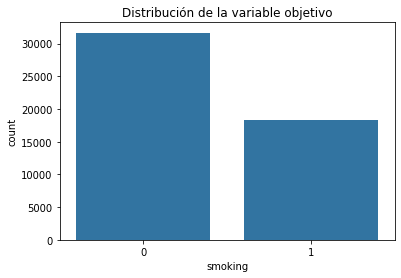

In [ ]:
# Info general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Valores faltantes
df.isnull().sum()

# Distribución de la variable objetivo
sns.countplot(x='smoking', data=df)
plt.title("Distribución de la variable objetivo")
plt.show()


In [8]:
# Verifico si tengo datos NAN
df.isna().sum()/df.shape[0]*100

# Se observa con no hay datos NAN

ID                     0.0
gender                 0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
oral                   0.0
dental caries          0.0
tartar                 0.0
smoking                0.0
dtype: float64

In [ ]:
# Convertir variables categóricas a numéricas
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['oral'] = label_enc.fit_transform(df['oral'])
df['tartar'] = label_enc.fit_transform(df['tartar'])

# Variable objetivo
y = df['smoking']
X = df.drop('smoking', axis=1)


In [10]:
X

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,0,40,155,60,3.38,0.04,0.04,0.04,0.04,...,5.25,0.51,0.04,0.00,0.75,0.79,1.13,0,0,1
1,1,0,40,160,60,3.38,0.01,0.00,0.04,0.04,...,5.29,0.50,0.04,0.00,0.92,0.79,0.75,0,0,1
2,2,1,55,170,60,3.33,0.01,0.01,0.04,0.04,...,6.29,0.63,0.04,0.04,0.88,0.67,0.92,0,0,0
3,3,1,40,165,70,3.67,0.05,0.05,0.04,0.04,...,9.42,0.59,0.04,0.04,0.79,1.08,0.75,0,0,1
4,4,0,40,155,60,3.58,0.04,0.04,0.04,0.04,...,4.46,0.50,0.04,0.00,0.67,0.58,0.92,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27343,1,50,160,55,2.96,0.00,0.01,0.04,0.04,...,3.04,0.55,0.04,0.04,0.96,0.58,0.92,0,0,1
49996,27350,1,30,170,70,3.33,0.05,0.04,0.04,0.04,...,3.21,0.63,0.04,0.01,1.08,1.21,0.75,0,1,1
49997,27351,1,20,165,65,3.54,0.05,0.05,0.04,0.04,...,2.21,0.67,0.04,0.01,1.46,1.46,2.92,0,0,1
49998,27352,0,60,160,45,2.96,0.00,0.00,0.04,0.04,...,4.13,0.58,0.04,0.00,0.79,0.67,1.04,0,1,1


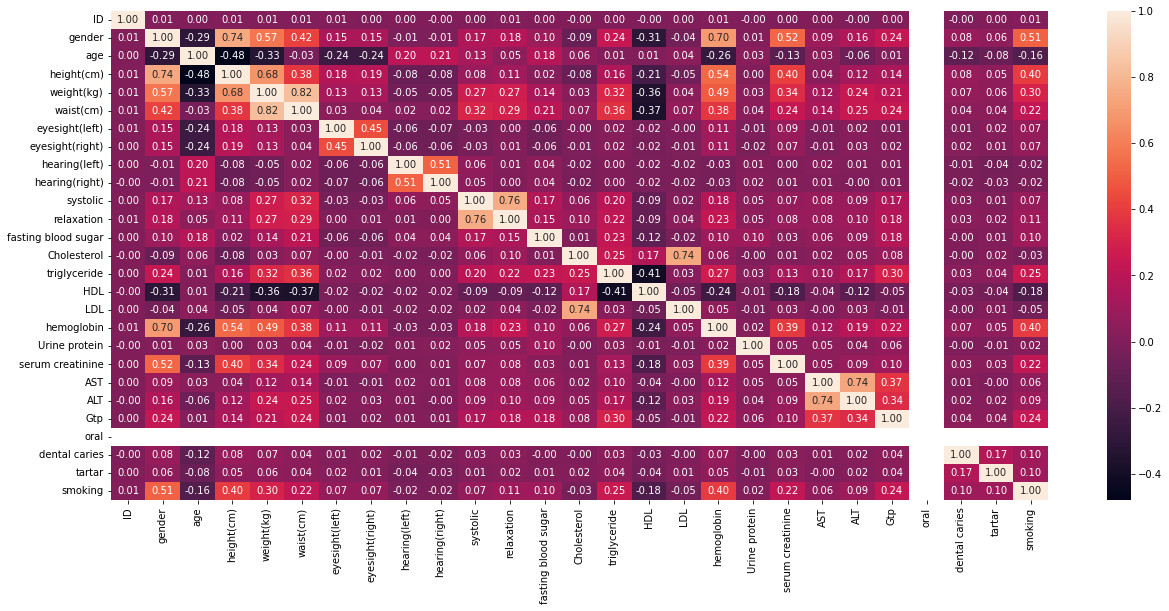

In [12]:
# TODO: Debo quitar ID para graficar.
# el campo "oral" está raro y no representa nada acá
# Generar un heatmap para ver correspondencia entre datos
plt.figure(figsize=(21,9))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()
#TODO: Elimino la variable oral, calcular matriz de correlación fumadora - no fumadores, calculo matrices de correlacion entre los que fuman y los que no

In [13]:
# Verifico la variabilidad de la variable smoking
df.smoking.value_counts(normalize=True)*100

smoking
0    63.342
1    36.658
Name: proportion, dtype: float64

### Divido los datos en entrenamiento y prueba
* Hago una división de 80% para entrenamiento y 20% para pruebas

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escalo variables 
* Se aplicó escalado a las variables para asegurar que todas contribuyan equitativamente en los modelos sensibles a la magnitud de los datos, tales como KNN, SVM y Regresión Logística.

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenar el modelo (Regresión logística)

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.741

Matriz de confusión:
[[4906 1420]
 [1170 2504]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      6326
           1       0.64      0.68      0.66      3674

    accuracy                           0.74     10000
   macro avg       0.72      0.73      0.73     10000
weighted avg       0.75      0.74      0.74     10000



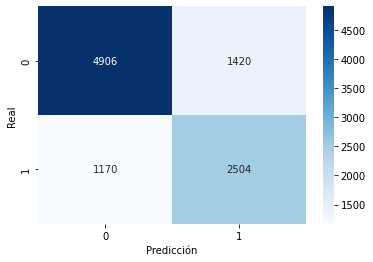

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Comparación con otros modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precisión": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

resultados_df = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
print(resultados_df)


                Modelo  Accuracy  Precisión    Recall  F1-Score
2        Random Forest    0.7938   0.713228  0.733805  0.723370
4                  SVM    0.7602   0.660544  0.714480  0.686454
5    Gradient Boosting    0.7592   0.659848  0.711214  0.684569
0  Regresión Logística    0.7410   0.638124  0.681546  0.659121
1    Árbol de Decisión    0.7298   0.631850  0.633914  0.632880
3                  KNN    0.7218   0.623820  0.611595  0.617647


#### Intento mejorar los modelos cambiando los hiperparámetros, comienzo con KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': list(range(1, 9))}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='f1',
    cv=5
)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [25]:
print("🔸 Mejor parámetro KNN:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))

🔸 Mejor parámetro KNN: {'n_neighbors': 7}
Accuracy: 0.7243
F1-Score: 0.6226905706856439


#### Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    scoring='f1',
    cv=5
)
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

In [26]:
print("🔸 Mejor Árbol:", grid_tree.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1-Score:", f1_score(y_test, y_pred_tree))

🔸 Mejor Árbol: {'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.7334
F1-Score: 0.6646540880503145


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5
)
grid_rf.fit(X_train, y_train)

In [31]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("🔸 Mejor Random Forest:", grid_rf.best_estimator_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

🔸 Mejor Random Forest: RandomForestClassifier(n_estimators=300, random_state=42)
Accuracy: 0.7966
F1-Score: 0.7301671530910055


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='f1',
    cv=5
)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)


In [28]:
print("🔸 Mejor Gradient Boosting:", grid_gb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))

🔸 Mejor Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7678
F1-Score: 0.6910590739755189


#### Comparativa

In [30]:
resultados_tuned = [
    {"Modelo": "KNN (Tuned)", "Accurancy": accuracy_score(y_test, y_pred_knn), "F1-Score": f1_score(y_test, y_pred_knn)},
    {"Modelo": "Árbol (Tuned)", "Accurancy": accuracy_score(y_test, y_pred_tree), "F1-Score": f1_score(y_test, y_pred_tree)},
    {"Modelo": "Random Forest (Tuned)", "Accurancy": accuracy_score(y_test, y_pred_rf), "F1-Score": f1_score(y_test, y_pred_rf)},
    {"Modelo": "Gradient Boosting (Tuned)", "Accurancy": accuracy_score(y_test, y_pred_gb), "F1-Score": f1_score(y_test, y_pred_gb)}
]

pd.DataFrame(resultados_tuned).sort_values(by="F1-Score", ascending=False)


,Modelo,Accurancy,F1-Score
2,Random Forest (Tuned),0.7966,0.730167
3,Gradient Boosting (Tuned),0.7678,0.691059
1,Árbol (Tuned),0.7334,0.664654
0,KNN (Tuned),0.7243,0.622691


### Dado que el método Random Forest es el más performante aplico las predicciones con el mismo.

In [35]:
# URL del archivo en Google Sheets (convertido a formato Excel descargable)
url = "https://docs.google.com/spreadsheets/d/1dpTMd0R0-YJ6psx8egWNR-IL5g6QPraL/export?format=xlsx"

# Cargar nuevos datos
new_df = pd.read_excel(url)

# Aplicar mismas transformaciones que en el dataset de entrenamiento
for col in ['gender','oral','tartar']:
    new_df[col] = label_enc.fit_transform(new_df[col])

# Escalar usando el scaler ya entrenado
new_scaled = scaler.transform(new_df[X.columns])

# Realizar predicción con el modelo Random Forest tuneado
pred = best_rf.predict(new_scaled)

# Crear DataFrame final solo con ID y Smoking
resultado_final = pd.DataFrame({
    'ID': new_df['ID'],
    'Smoking': pred
})

# Guardar archivo final
resultado_final.to_excel("predicciones_finales.xlsx", index=False)

resultado_final.head()


,ID,Smoking
0,27358,1
1,27364,1
2,27368,1
3,27378,0
4,27381,1
